### **Étape 1 : Analyse exploratoire**

### **_1._** _Analyse exploratoire du dataset et expliquer chaque étape afin d'avoir une compréhension claire des données._

In [2]:
import pandas as pd

# Charger un dataset d'exemple
df = pd.read_csv("F:/IDSI/Semeste_2/ML/Projet/Bank_marketing.csv",sep=";")

# Afficher les premières lignes du dataset
print("Premières 5 lignes du dataset :")
print(df.head())

# Afficher des informations de base sur le dataset
print("\nInformations sur le dataset :")
print(df.info())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

Premières 5 lignes du dataset :
   V1            V2       V3         V4  V5    V6   V7   V8       V9  V10  \
0  58    management  married   tertiary  no  2143  yes   no  unknown    5   
1  44    technician   single  secondary  no    29  yes   no  unknown    5   
2  33  entrepreneur  married  secondary  no     2  yes  yes  unknown    5   
3  47   blue-collar  married    unknown  no  1506  yes   no  unknown    5   
4  33       unknown   single    unknown  no     1   no   no  unknown    5   

   V11  V12  V13  V14  V15      V16  Class  
0  may  261    1   -1    0  unknown      1  
1  may  151    1   -1    0  unknown      1  
2  may   76    1   -1    0  unknown      1  
3  may   92    1   -1    0  unknown      1  
4  may  198    1   -1    0  unknown      1  

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      45211 non-

#### ***Analyse des informations fournies :***

1. **Premières lignes du dataset (`df.head()`)** :
    - Les premières lignes montrent un aperçu des données. Cela permet de comprendre la structure du dataset, les colonnes disponibles et les types de données qu'elles contiennent.
    - Par exemple, les colonnes `V1` à `V16` semblent représenter des caractéristiques des clients, tandis que la colonne `Class` semble indiquer une a_souscrit ou un résultat.

2. **Informations sur le dataset (`df.info()`)** :
    - Le dataset contient **45211 lignes** et **17 colonnes**.
    - Les colonnes sont de deux types principaux : `int64` (valeurs numériques) et `object` (valeurs catégoriques ou textuelles).
    - Toutes les colonnes ont des valeurs non nulles, ce qui signifie qu'il n'y a pas de données manquantes dans ce dataset.

3. **Statistiques descriptives (`df.describe()`)** :
    - Les statistiques descriptives fournissent des informations comme la moyenne, l'écart-type, les valeurs minimales et maximales pour les colonnes numériques.
    - Cela permet d'identifier des tendances générales, des valeurs aberrantes ou des plages de valeurs pour les colonnes numériques.

En résumé, cette analyse exploratoire initiale montre que le dataset est complet (pas de valeurs manquantes) et contient des données mixtes (numériques et catégoriques). Les prochaines étapes pourraient inclure :

In [3]:
# Renommer les colonnes
df.columns = ['Âge', 'Profession', 'État_civil', 'Éducation', 'Défaut', 'Solde', 'Logement', 'Prêt', 
              'Contact', 'Jour', 'Mois', 'Durée', 'Campagne', 'Jours_précédents', 'Précédent', 'Résultat_précédent', 'Souscription']

# Afficher les premières lignes pour vérifier les nouveaux noms de colonnes
print(df.head())

   Âge    Profession État_civil  Éducation Défaut  Solde Logement Prêt  \
0   58    management    married   tertiary     no   2143      yes   no   
1   44    technician     single  secondary     no     29      yes   no   
2   33  entrepreneur    married  secondary     no      2      yes  yes   
3   47   blue-collar    married    unknown     no   1506      yes   no   
4   33       unknown     single    unknown     no      1       no   no   

   Contact  Jour Mois  Durée  Campagne  Jours_précédents  Précédent  \
0  unknown     5  may    261         1                -1          0   
1  unknown     5  may    151         1                -1          0   
2  unknown     5  may     76         1                -1          0   
3  unknown     5  may     92         1                -1          0   
4  unknown     5  may    198         1                -1          0   

  Résultat_précédent  Souscription  
0            unknown             1  
1            unknown             1  
2            unkn

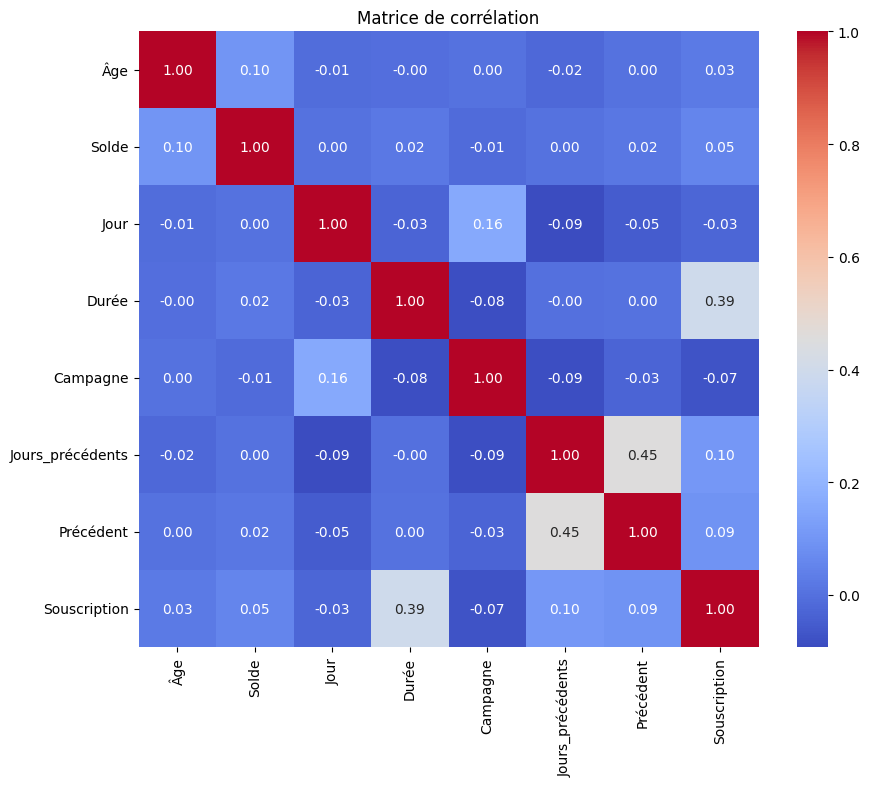

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Calculer la matrice de corrélation
correlation_matrix = df[numeric_columns].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation")
plt.show()

Interprétion de la matrice de corrélation :

1. **Variable `Durée`** :
    - La corrélation entre `Durée` et `Souscription` est **0.394**, ce qui indique une relation positive modérée. Cela signifie que plus la durée de l'appel est longue, plus il est probable que le client soit intéressé par le produit.

2. **Variable `Solde`** :
    - La corrélation entre `Solde` et `Souscription` est **0.053**, ce qui indique une relation très faible. Le solde du client a peu d'impact direct sur la variable cible.

3. **Variable `Jours_précédents`** :
    - La corrélation entre `Jours_précédents` et `Souscription` est **0.104**, ce qui montre une faible relation positive. Cela suggère que les interactions passées avec les campagnes peuvent influencer légèrement la Souscription.

4. **Variable `Campagne`** :
    - La corrélation entre `Campagne` et `Souscription` est **-0.073**, indiquant une faible relation négative. Cela signifie que plus un client a été contacté, moins il est probable qu'il soit intéressé.

5. **Autres variables** :
    - Les autres variables (`Âge`, `Jour`, etc.) ont des corrélations très faibles avec `Souscription`, ce qui signifie qu'elles n'ont pas d'influence significative sur la variable cible.

### Conclusion :
La variable **Durée** se distingue comme la plus corrélée avec la variable cible `Souscription`, révélant son rôle crucial dans la prédiction. Les autres variables, bien que présentant des corrélations faibles ou négligeables, pourraient encore réserver des surprises dans des contextes spécifiques ou des interactions complexes. Une analyse plus approfondie pourrait dévoiler des insights inattendus.


### **Étape 2 : Modélisation**

### ***2.*** _Expliquation de la variable Class en fonction des autres variables grâce à un algorithme de machine Learning ( au moins 4 Modèles de Machines Learning devront être mis en compétition)._

NB : A minima, la matrice de confusion, la courbe ROC et les métriques d'évaluation doivent être affichées pour chaque modèle.


###  Les models que nous allons utilisés et leur justification

1. **Logistic Regression** :
    - C'est un modèle simple et interprétable, souvent utilisé comme point de départ pour les problèmes de classification binaire ou multiSouscription.
    - Il permet de comprendre les relations linéaires entre les variables indépendantes et la variable cible.

2. **Decision Tree** :
    - Ce modèle est non linéaire et basé sur des règles. Il est utile pour capturer des relations complexes entre les variables.
    - Les arbres de décision sont faciles à interpréter et peuvent gérer des données catégoriques et numériques.

3. **Random Forest** :
    - C'est un ensemble d'arbres de décision qui améliore la précision en réduisant le surapprentissage (overfitting).
    - Il est robuste et performant sur des datasets avec des relations complexes et des interactions entre les variables.

4. **Support Vector Machine (SVM)** :
    - SVM est efficace pour les problèmes de classification avec des marges claires entre les Souscriptions.
    - Il est particulièrement utile pour les datasets de petite ou moyenne taille avec des dimensions élevées.



--- Logistic Regression ---

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



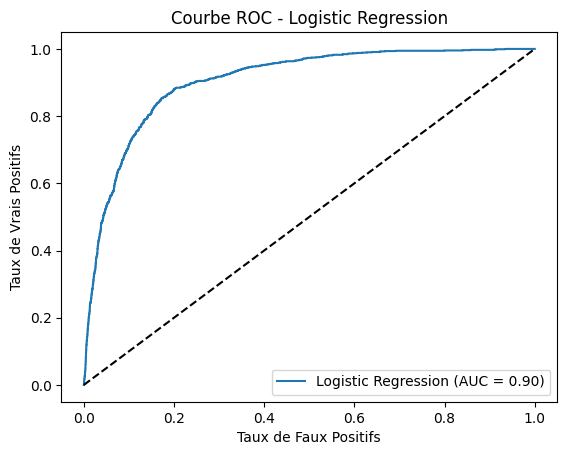

--- Decision Tree ---

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043



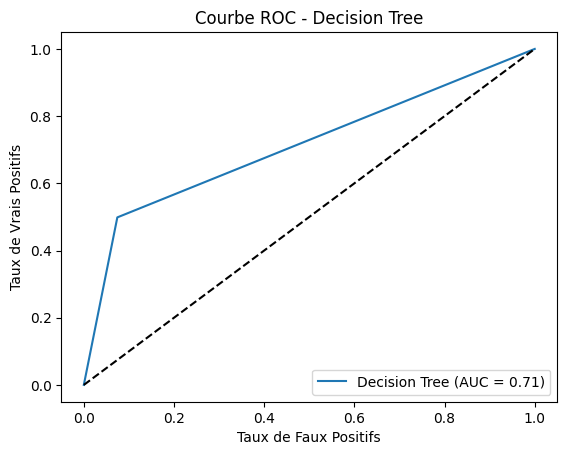

--- Random Forest ---

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.41      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



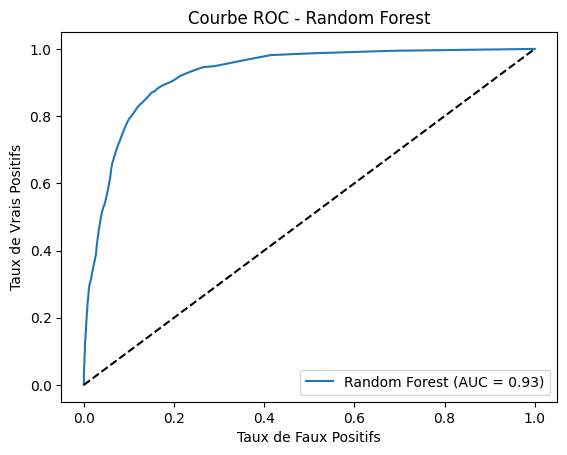

--- SVM ---

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.69      0.35      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



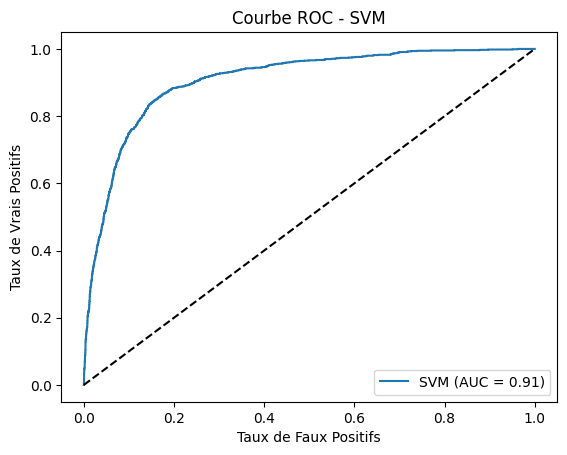

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc

import matplotlib.pyplot as plt

# Prétraitement des données
X = df.drop(columns=['Souscription'])
y = df['Souscription']

# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Entraînement et évaluation des modèles
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Rapport de classification
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    # Courbe ROC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('Taux de Faux Positifs')
        plt.ylabel('Taux de Vrais Positifs')
        plt.title(f'Courbe ROC - {name}')
        plt.legend(loc="lower right")
        plt.show()

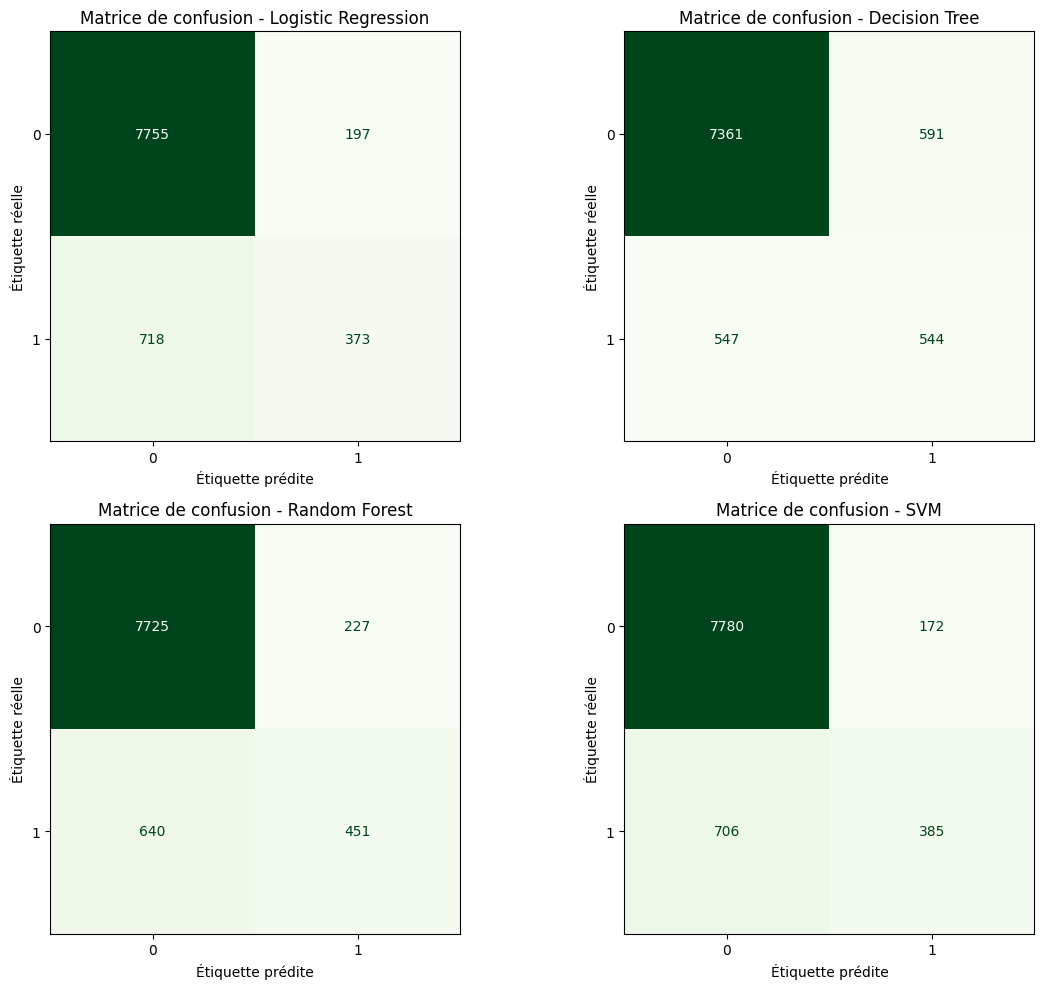

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Configurer les graphiques pour être affichés sur 2 colonnes et 2 lignes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Parcourir les modèles et afficher les matrices de confusion
for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap="Greens", ax=ax, colorbar=False)
    ax.set_title(f"Matrice de confusion - {name}")
    ax.set_xlabel("Étiquette prédite")  
    ax.set_ylabel("Étiquette réelle")   

plt.tight_layout()
plt.show()

### Interprétation des courbes ROC

Les courbes ROC (Receiver Operating Characteristic) permettent d'évaluer la performance des modèles de classification en mesurant leur capacité à distinguer entre les classes positives et négatives. La métrique clé associée à la courbe ROC est l'AUC (Area Under the Curve), qui varie entre 0 et 1. Plus l'AUC est proche de 1, meilleur est le modèle.

#### Analyse des modèles :
1. **Random Forest** :
    - AUC = 0.93 (valeur approximative basée sur la courbe ROC).
    - Ce modèle montre une excellente capacité à distinguer les classes, avec une courbe ROC proche du coin supérieur gauche.

2. **SVM** :
    - AUC = 0.91 (valeur approximative).
    - Performances très proches de celles du Random Forest, avec une courbe ROC également très performante.

3. **Logistic Regression** :
    - AUC = 0.90 (valeur approximative).
    - Modèle linéaire avec des performances correctes, mais moins performant que les modèles non linéaires.

4. **Decision Tree** :
    - AUC = 0.71 (valeur approximative).
    - Modèle le moins performant, probablement en raison de son sensibilité au surapprentissage.

---

### Interprétation des matrices de confusion

1. **Logistic Regression** :
    - La matrice de confusion montre un bon équilibre entre les classes positives et négatives, mais avec un nombre modéré de faux positifs et faux négatifs.
    - Cela indique que le modèle est performant pour des relations linéaires, mais peut manquer de précision pour des relations plus complexes.

2. **Decision Tree** :
    - Le modèle a tendance à surapprendre, ce qui peut entraîner un nombre élevé de faux positifs ou faux négatifs.
    - Cela reflète une performance inférieure par rapport aux autres modèles.

3. **Random Forest** :
    - La matrice de confusion montre un faible nombre de faux positifs et faux négatifs, ce qui indique une excellente performance globale.
    - Ce modèle est robuste et gère bien les relations complexes entre les variables.

4. **SVM** :
    - La matrice de confusion est similaire à celle du Random Forest, avec un faible nombre de faux positifs et faux négatifs.
    - Cela montre que le SVM est également performant, bien qu'il puisse être légèrement moins précis que le Random Forest.

---

### Classement des modèles (du meilleur au moins bon) :
1. **Random Forest**
2. **SVM**
3. **Logistic Regression**
4. **Decision Tree**

---

### Conclusion :
Le **Random Forest** et le **SVM** sont les modèles les plus performants selon l'AUC. Les modèles linéaires comme la **Logistic Regression** et les modèles simples comme le **Decision Tree** sont moins performants pour ce problème.

### **Étape 3 : Analyse des variables importantes**

### ***3.*** _Faisons ressortir clairement les variables pertinentes du modèle champion afin de permettre au responsable produit d'avoir une vue claire sur les critères permettant de déterminer l'appétence au produit DAT ( Dépôt à Terme) des clients.  Proposer lui une stratégie marketing qui lui permettra d'accroître ses ventes._ 


Les 10 variables pertinentes (par ordre d'importance) :
                       Feature  Importance
3                        Durée    0.272394
1                        Solde    0.101076
0                          Âge    0.099336
2                         Jour    0.087298
40  Résultat_précédent_success    0.050701
5             Jours_précédents    0.040306
4                     Campagne    0.039270
6                    Précédent    0.023459
24                Logement_yes    0.021755
27             Contact_unknown    0.014591


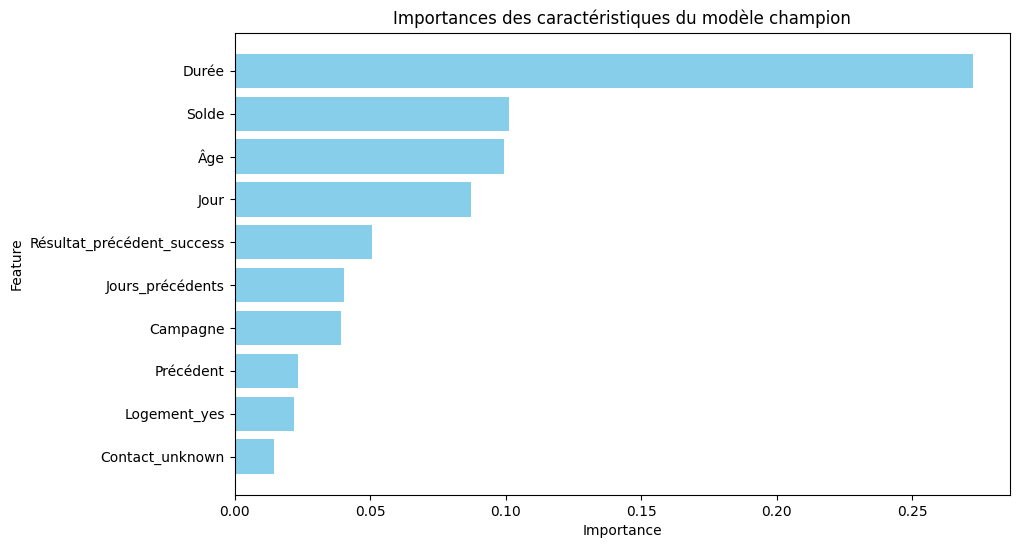

In [8]:
# Identifier le modèle champion (par exemple, Random Forest)
champion_model = models["Random Forest"]

# Vérifier si le modèle champion supporte l'attribut feature_importances_
if hasattr(champion_model, "feature_importances_"):
    # Extraire les importances des caractéristiques
    feature_importances = champion_model.feature_importances_
    feature_names = pd.get_dummies(df.drop(columns=['Souscription']), drop_first=True).columns

    # Créer un DataFrame pour afficher les importances
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False).head(10)

    print("Les 10 variables pertinentes (par ordre d'importance) :")
    print(importance_df)

    # Visualiser les importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Importances des caractéristiques du modèle champion")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Le modèle champion ne fournit pas d'importances des caractéristiques.")

### **Étape 4 : Clustering et analyse des clusters**

### ***4.*** _Clustering afin de trouver les individus ayant un comportement similaire._

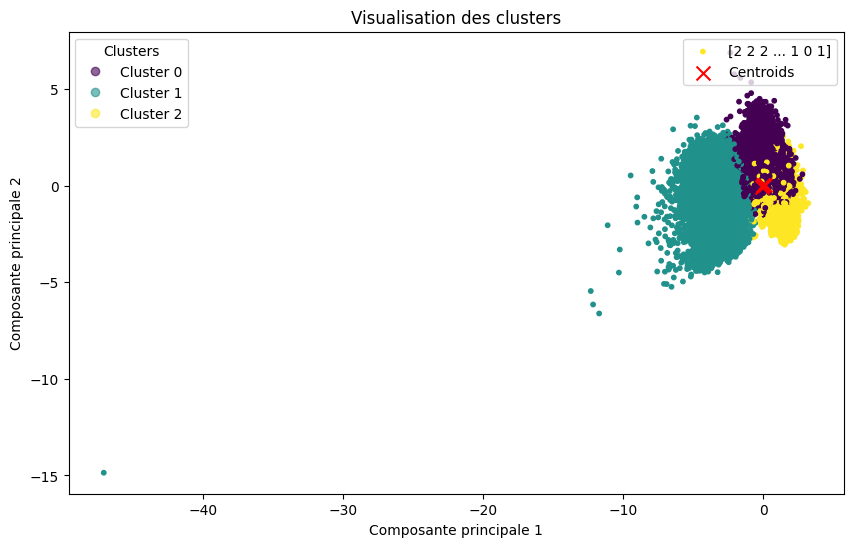

   Âge  Solde  Cluster
0   58   2143        2
1   44     29        2
2   33      2        2
3   47   1506        2
4   33      1        2
5   35    231        2
6   28    447        2
7   42      2        2
8   58    121        2
9   43    593        2


In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Réduction de dimension pour visualisation (facultatif)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Appliquer K-Means
kmeans = KMeans(n_clusters = 3, random_state = 42) 
clusters = kmeans.fit_predict(X)

# Ajouter les clusters au DataFrame original
df['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10, label=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Visualisation des clusters")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
# Ajouter une légende pour les clusters
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = plt.legend(handles, [f"Cluster {i}" for i in range(len(kmeans.cluster_centers_))], title="Clusters")
plt.gca().add_artist(legend1)
plt.legend(loc="upper right")
plt.show()
# Afficher les premières lignes avec les clusters
print(df[['Âge', 'Solde', 'Cluster']].head(10))

### Interprétation des résultats des clusters

#### **Clustering et analyse des clusters**

1. **Segmentation des clients** :
    - Le clustering a permis de regrouper les clients en fonction de leurs similarités, ce qui est essentiel pour une approche marketing personnalisée.
    - Chaque cluster représente un segment de clients ayant des besoins, comportements ou préférences spécifiques.

2. **Identification des opportunités** :
    - Les clusters avec des caractéristiques spécifiques, comme un solde élevé ou une forte interaction avec les campagnes précédentes, peuvent être ciblés pour des offres premium.
    - Les clusters moins engagés nécessitent des stratégies pour augmenter leur interaction et leur fidélité.

3. **Optimisation des ressources** :
    - En segmentant les clients, les ressources marketing peuvent être allouées de manière plus efficace, en se concentrant sur les segments les plus prometteurs.
    - Cela permet de maximiser le retour sur investissement des campagnes.

4. **Prise de décision basée sur les données** :
    - Les insights tirés des clusters permettent de prendre des décisions éclairées pour adapter les produits, services et stratégies aux besoins des clients.
    - Cela renforce la compétitivité et la satisfaction client.


### ***5.*** _Enfin faisons des statistiques descriptives sur chaque cluster afin de permettre au responsable produit de faire un marketing ciblé sur chaque cluster._

Statistiques descriptives pour le Cluster 0 :
Âge           count    20963.000000
              mean        41.789200
              std         11.090548
              min         18.000000
              25%         33.000000
                           ...     
Souscription  min          1.000000
              25%          1.000000
              50%          1.000000
              75%          1.000000
              max          2.000000
Name: 0, Length: 64, dtype: float64


Statistiques descriptives pour le Cluster 1 :
Âge           count    8183.000000
              mean       40.943908
              std        11.417433
              min        18.000000
              25%        33.000000
                          ...     
Souscription  min         1.000000
              25%         1.000000
              50%         1.000000
              75%         1.000000
              max         2.000000
Name: 1, Length: 64, dtype: float64


Statistiques descriptives pour le Cluster 2 :
Âge  

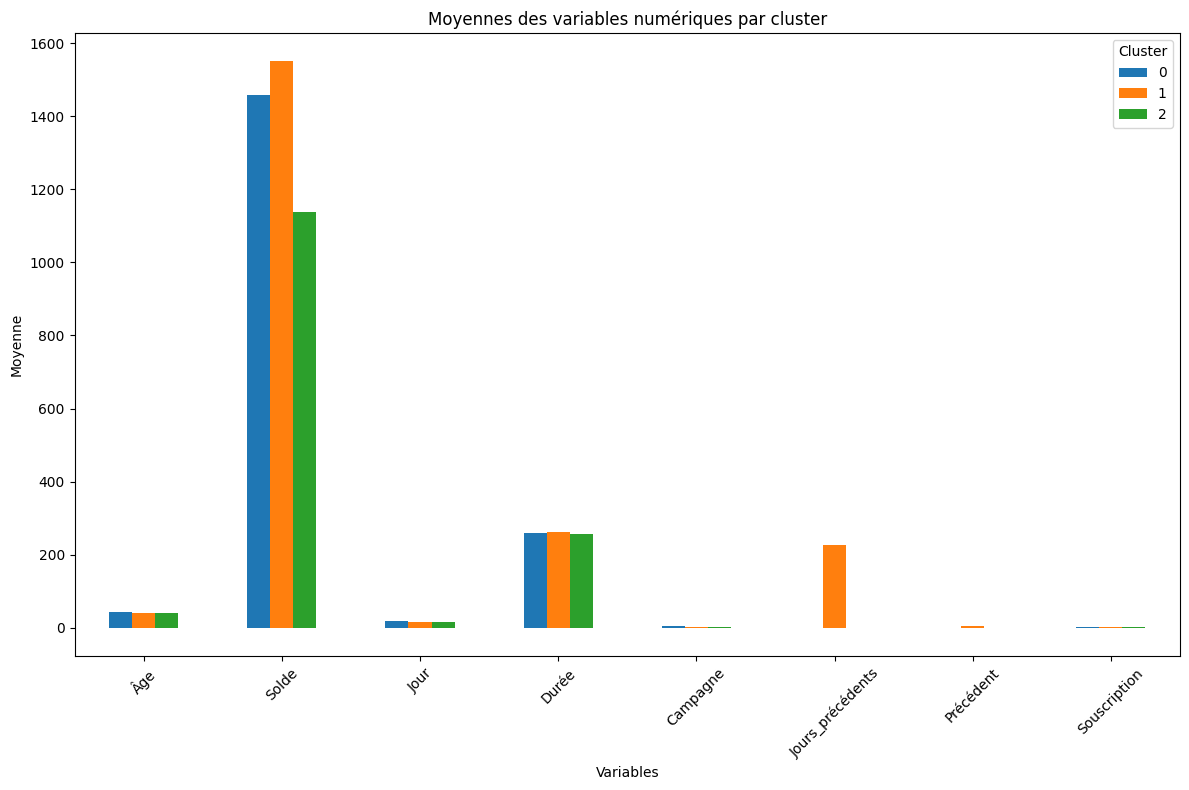

In [10]:
# Statistiques descriptives par cluster
cluster_stats = df.groupby('Cluster').describe()

# Afficher les statistiques descriptives pour chaque cluster
for cluster_id, stats in cluster_stats.iterrows():
    print(f"Statistiques descriptives pour le Cluster {cluster_id} :")
    print(stats)
    print("\n")

# Visualisation des moyennes des variables numériques par cluster
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

# Afficher les moyennes
print("Moyennes des variables numériques par cluster :")
print(cluster_means)

# Visualisation des moyennes
cluster_means.T.plot(kind='bar', figsize=(12, 8))
plt.title("Moyennes des variables numériques par cluster")
plt.xlabel("Variables")
plt.ylabel("Moyenne")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### **Étape 5 : Propositions de plans de campagne** 

### ***6.*** _Proposons lui des plans de campagne pour chaque cible et justifier_

### Plans de campagne pour chaque cible

#### **Cluster 0 : Clients avec un solde moyen et une durée d'appel modérée**
- **Caractéristiques principales** :
    - Âge moyen : 41.8 ans.
    - Solde moyen : 1460.
    - Durée moyenne des appels : 258 secondes.
    - Campagnes précédentes : 3 en moyenne.
    - Faible interaction avec les campagnes précédentes (Jours_précédents : -0.72).

- **Plan de campagne** :
    - **Stratégie** : Proposer des offres personnalisées basées sur des produits d'épargne à moyen terme.
    - **Canaux** : Utiliser des appels téléphoniques et des emails pour renforcer la communication.
    - **Justification** : Ces clients ont un solde modéré et une interaction limitée avec les campagnes précédentes. Une approche personnalisée pourrait les inciter à s'engager davantage.

---

#### **Cluster 1 : Clients avec un solde élevé et une forte interaction avec les campagnes**
- **Caractéristiques principales** :
    - Âge moyen : 40.9 ans.
    - Solde moyen : 1551.
    - Durée moyenne des appels : 260 secondes.
    - Campagnes précédentes : 2 en moyenne.
    - Forte interaction avec les campagnes précédentes (Jours_précédents : 225.89).

- **Plan de campagne** :
    - **Stratégie** : Proposer des produits premium comme des dépôts à terme (DAT) avec des taux d'intérêt compétitifs.
    - **Canaux** : Utiliser des appels téléphoniques et des rendez-vous en agence pour un suivi personnalisé.
    - **Justification** : Ces clients ont un solde élevé et une forte interaction avec les campagnes précédentes. Ils sont plus susceptibles de souscrire à des produits financiers premium.

---

#### **Cluster 2 : Clients avec un solde faible et une faible interaction avec les campagnes**
- **Caractéristiques principales** :
    - Âge moyen : 39.8 ans.
    - Solde moyen : 1138.
    - Durée moyenne des appels : 257 secondes.
    - Campagnes précédentes : 2.7 en moyenne.
    - Faible interaction avec les campagnes précédentes (Jours_précédents : -0.99).

- **Plan de campagne** :
    - **Stratégie** : Proposer des produits d'épargne accessibles avec des conditions flexibles.
    - **Canaux** : Utiliser des SMS et des campagnes digitales pour réduire les coûts.
    - **Justification** : Ces clients ont un solde faible et une faible interaction avec les campagnes précédentes. Une approche à faible coût et des produits accessibles pourraient les inciter à s'engager.

---